# Compare inflow profiles against lidar

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
from scipy import integrate

from matplotlib.lines import Line2D

In [2]:
def plotrotorlines(zhh, rotorD, xstart, xend, **kwargs):
    plt.hlines(zhh,             xstart, xend, linewidth=1.0, **kwargs) # Plot the HH line
    plt.hlines(zhh+rotorD*0.5,  xstart, xend, linewidth=0.5, **kwargs) # Plot the HH line
    plt.hlines(zhh-rotorD*0.5,  xstart, xend, linewidth=0.5, **kwargs) # Plot the HH line   

In [3]:
# Put the list of all cases in here
cases = [
    # AMR-Wind data defs
    {'label':'AMRWIND',
     'datadir':'../AMR.5kmX5km_noturbine1/post_processing/data_noturb',
     'prefix':'AMRWIND',
     'fname':'{prefix}_InflowProfiles_noturbine_x_-2.0D.dat',
     'linestyle':{'linestyle':'-', 'lw':2},
    },
    
    # WRFLES data defs
    {'label':'WRFLES',
     'datadir':'../WRFLES.5kmX5km_turbine1/post_processing/data',
     'prefix':'WRFLES',
     'fname':'{prefix}_InflowProfiles_noturbine.dat',
     'linestyle':{'linestyle':'-.', 'lw':1},
    },

    # Nalu data defs
    {'label':'NALUWIND',
     'datadir':'../NALU.5kmX5km_turbine1/postprocessing/data_noturb/InflowData/',
     'prefix':'NALUWIND',
     'fname':'Nalu_-2D_profile.txt',
     'linestyle':{'linestyle':'--', 'lw':2},
    },
    
]

In [4]:
zhh    = 90
rotorD = 127.0

# lidar data location
lidardir='../../precursor/NeutralABL1/postprocessing/'

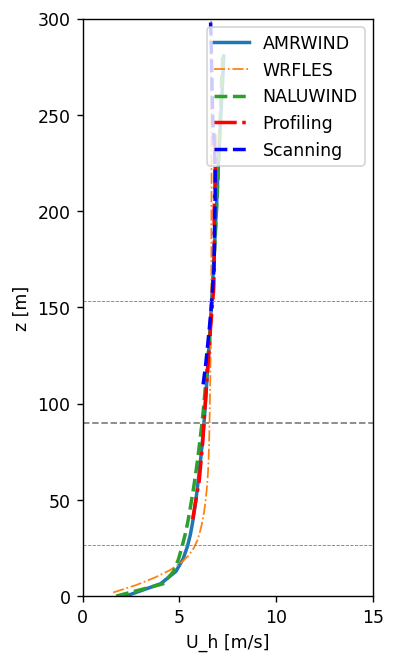

In [5]:
# Plot wind speed
WS_profiling = np.loadtxt(lidardir+'/Profiles_WindSpeed_a1_selectedcase_profiling.txt',delimiter=',')
WS_scanning  = np.loadtxt(lidardir+'/Profiles_WindSpeed_a1_selectedcase_scanning.txt',delimiter=',') 

fig, ax = plt.subplots(1,1, figsize=(3,6), dpi=125)
for icase, case in enumerate(cases):
    label   = case['label']
    prefix  = case['prefix']
    datadir = case['datadir']
    fname   = case['fname'] 
    lstyle  = case['linestyle']
    dat=np.loadtxt(datadir+'/'+fname.format(prefix=prefix))
    z  = dat[:,0]
    uh = dat[:,1]
    ax.plot(uh, z,  label=label, **lstyle)

# Plot lidar data
ax.plot(WS_profiling[:,0], WS_profiling[:,1], 'r-.', label='Profiling', lw=2)
ax.plot(WS_scanning[:,0],  WS_scanning[:,1],  'b--', label='Scanning', lw=2)

# Plot the turbine dimensions
plotrotorlines(zhh, rotorD, 0, 20, linestyles='dashed', color='gray',)

ax.set_ylim([0,300])
ax.set_xlim([0, 15])
ax.set_ylabel('z [m]')
ax.set_xlabel('U_h [m/s]')
ax.legend(loc='upper right')

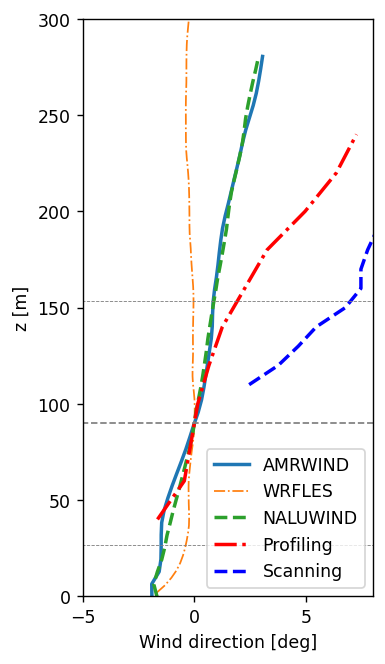

In [6]:
WD_profiling = np.loadtxt(lidardir+'/Profiles_WindDirection_a1_selectedcase_profiling.txt',delimiter=',')
WD_scanning  = np.loadtxt(lidardir+'/Profiles_WindDirection_a1_selectedcase_scanning.txt',delimiter=',')
WD_zhh = np.interp(zhh, WD_profiling[:,1], WD_profiling[:,0])

fig, ax = plt.subplots(1,1, figsize=(3,6), dpi=125)
for icase, case in enumerate(cases):
    label   = case['label']
    prefix  = case['prefix']
    datadir = case['datadir']
    fname   = case['fname'] 
    lstyle  = case['linestyle']
    dat=np.loadtxt(datadir+'/'+fname.format(prefix=prefix))
    zvec= dat[:,0]
    WD = dat[:,2]
    thetahh = np.interp(zhh, zvec, WD)
    ax.plot(WD-thetahh, zvec, label=label, **lstyle)
    
ax.plot(WD_profiling[:,0]-WD_zhh, WD_profiling[:,1], 'r-.', label='Profiling', lw=2)
ax.plot(WD_scanning[:,0]-WD_zhh,  WD_scanning[:,1],  'b--', label='Scanning', lw=2)

# Plot the turbine dimensions
plotrotorlines(zhh, rotorD, -10, 10, linestyles='dashed', color='gray',)

ax.set_ylim([0,300])
ax.set_xlim([-5, 8])
ax.set_ylabel('z [m]')
ax.set_xlabel('Wind direction [deg]')
ax.legend()

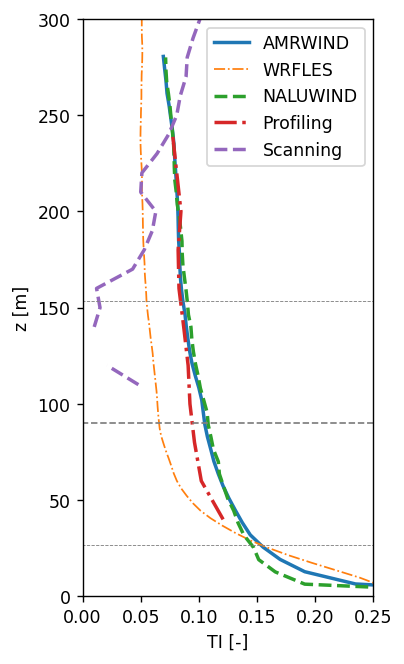

In [7]:
# Load and plot the lidar data
TI_profiling = np.loadtxt(lidardir+'/Profiles_TurbInt_a1_selectedcase_profiling.txt',delimiter=',')
TI_scanning  = np.loadtxt(lidardir+'/Profiles_TurbInt_a1_selectedcase_scanning.txt',delimiter=',')

fig, ax = plt.subplots(1,1, figsize=(3,6), dpi=125)
for icase, case in enumerate(cases):
    label   = case['label']
    prefix  = case['prefix']
    datadir = case['datadir']
    fname   = case['fname'] 
    lstyle  = case['linestyle']
    dat  =np.loadtxt(datadir+'/'+fname.format(prefix=prefix))
    zvec = dat[:,0]
    TI_horiz  = dat[:,5]
    ax.plot(TI_horiz, zvec,  label=label, **lstyle)
    
ax.plot(TI_profiling[:,0], TI_profiling[:,1], '-.', label='Profiling', lw=2)
ax.plot(TI_scanning[:,0],  TI_scanning[:,1],  '--', label='Scanning', lw=2)

# Plot the turbine dimensions
plotrotorlines(zhh, rotorD, -10, 10, linestyles='dashed', color='gray',)

ax.set_ylim([0, 300])
ax.set_xlim([0, 0.25])
ax.set_ylabel('z [m]')
ax.set_xlabel('TI [-]')
ax.legend()

In [8]:
# Print out a chart of information
print('%10s %10s %10s %10s %10s %10s %10s %10s'%('case','WS','WDir','TI_HH', 'TIrotor', 'alpha', 'veer','Tground'))
for icase, case in enumerate(cases):
    label   = case['label']
    prefix  = case['prefix']
    datadir = case['datadir']
    fname   = case['fname'] 
    lstyle  = case['linestyle']
    dat=np.loadtxt(datadir+'/'+fname.format(prefix=prefix))

    WS   = np.interp(zhh, dat[:,0], dat[:,1])
    WDir = np.interp(zhh, dat[:,0], dat[:,2])
    TI   = np.interp(zhh, dat[:,0], dat[:,5])

    z1 = zhh+0.5*rotorD
    z2 = zhh-0.5*rotorD
    # Calculate shear
    UTOP = np.interp(z1, dat[:,0], dat[:,1])
    UBOT = np.interp(z2, dat[:,0], dat[:,1])
    alpha = np.log(UTOP/UBOT)/np.log(z1/z2)
    # Calculate TI rotor
    TIfunc = lambda z: np.interp(z, dat[:,0], dat[:,5])
    TIrotor = integrate.quad(TIfunc, z2, z1)[0]/(z1-z2)
    
    # Calculate veer
    WDirTOP = np.interp(zhh+0.5*rotorD, dat[:,0], dat[:,2])
    WDirBOT = np.interp(zhh-0.5*rotorD, dat[:,0], dat[:,2])
    VeerRotor = WDirTOP - WDirBOT

    Tground = dat[0,3]

    print('%10s %10f %10f %10f %10f %10f %10f %10f'%(label, WS, WDir, TI, TIrotor, alpha, VeerRotor, Tground))

      case         WS       WDir      TI_HH    TIrotor      alpha       veer    Tground
   AMRWIND   6.264256 265.732348   0.105000   0.109074   0.116898   2.329454   0.000000
    WRFLES   6.552085 265.800059   0.065797   0.076204   0.075529   0.351174 305.363600
  NALUWIND   6.162848 265.836528   0.107933   0.110330   0.147369   2.183390 305.002229


/tmp/ipykernel_45897/1204211190.py:23: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  TIrotor = integrate.quad(TIfunc, z2, z1)[0]/(z1-z2)
